# Investing in real-estate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## House investment

In [2]:
def value_house(n_years, house_value, house_ret):
    return house_value*(1+house_ret)**n_years


def total_pay_to_bank(
    house_value,
    n_years_plan,
    int_rate_house,
    initial_investment,
    fixed_initial_costs=[0]
    ):
    
    loan = house_value-initial_investment+np.sum(fixed_initial_costs)
    pay_to_bank = loan*(1+int_rate_house)**n_years_plan
    return pay_to_bank

def house_investment_return(
    house_value,
    initial_investment,
    int_rate,
    value_rate,
    n_years,
    fixed_initial_costs=[0],
    fixed_yearly_costs=[0]
    ):
    
    pay_to_bank = total_pay_to_bank(
        house_value,
        n_years,
        int_rate,
        initial_investment,
        fixed_initial_costs
    )
    total_yearly_costs = np.sum(fixed_yearly_costs)*n_years
    total_paid = pay_to_bank+total_yearly_costs+initial_investment
    
    house_value = house_value*(1+value_rate)**n_years
    total_investment_return = house_value-total_paid
    
    return total_investment_return

In [3]:
def monthly_pay_house(
    house_value,
    n_years,
    int_rate,
    initial_investment,
    fixed_initial_costs,
    monthly_expenses = 0
    ):
    
    monthly_to_bank = total_pay_to_bank(
        house_value,
        n_years,
        int_rate,
        initial_investment,
        fixed_initial_costs
        )/n_years/12.0

    return monthly_expenses + monthly_to_bank


# Return in other investment

In [63]:
def return_on_investment(initial_investment, yearly_return, monthly_io, n_years, annual_decr=0):
    if monthly_io<0:
        print('Negative monthly io')
    value = initial_investment
    monthly_return = (1+yearly_return)**(1/12.0)-1.0
    for k in range(n_years):
        monthly_io-=annual_decr
        for month in range(12):
            value*=(1+monthly_return)
            value+=monthly_io
    return value

# Putting the two together

If I buy a house, the ammount I will need to pay to the bank, monthly, is given by the function monthly_pay_house.

These will be the only expenses I have for the house.

On the other hand, if I rent the house, I have to pay the rent monthly, and that's it. Consider the month_diff to be the difference between what I pay monthly if I owned a house and what I pay for rent.

Imagine that I take my initial investment and month_diff of each month and I invest it in a security with a given yearly rate return.

Under which conditions is buying a house more advantageous?

In [64]:
house_price = 200000.0
initial_investment = 10000.0
int_rate = 0.02
value_house_rate = 0.05
n_years = 20
rent = 775
investment_return = 0.05
fixed_initial_costs = np.array([
    house_price*0.1, # register
    3000, #notary
    ])
fixed_yearly_costs = np.array([0])

In [65]:
house_investment_return(
    house_price,
    initial_investment,
    int_rate,
    value_house_rate,
    n_years,
    fixed_initial_costs,
    fixed_yearly_costs)

204152.74568549485

In [66]:
monthly_pay_house(
    house_price,
    n_years,
    int_rate,
    initial_investment,
    fixed_initial_costs,
    monthly_expenses = 0
    )

1318.77831393079

In [67]:
month_diff = monthly_pay_house(
    house_price,
    n_years,
    int_rate,
    initial_investment,
    fixed_initial_costs,
    monthly_expenses = np.sum(fixed_yearly_costs)/12
    ) - rent

print(month_diff)

final_investment_value = return_on_investment(
    initial_investment,
    yearly_return=investment_return,
    monthly_io=month_diff,
    n_years=n_years)

543.7783139307901


In [68]:
final_investment_value - house_investment_return(
    house_price,
    initial_investment,
    int_rate,
    value_house_rate,
    n_years,
    fixed_initial_costs,
    fixed_yearly_costs)

43047.91017761713

# Example

Number of years: 20

### Buying house
* House price: 200k€
* Interest rate: variable
* Initial costs:
    * Notary: 3k€
    * Registration: 20k€
* Initial investment: 10k€

### Renting
* Rent: 775€

### Assumptions on investment:
* House valuation rate: 5%/year
* Other investment: 5%/year

In [69]:
int_rate=np.arange(0,0.04,0.005)

In [70]:
return_house = house_investment_return(
    house_price,
    initial_investment,
    int_rate,
    value_house_rate,
    n_years,
    fixed_initial_costs,
    fixed_yearly_costs)

In [71]:
monthly_pay_house(
    house_price,
    n_years,
    int_rate,
    initial_investment,
    fixed_initial_costs,
    monthly_expenses = np.sum(fixed_yearly_costs)/12
    )

array([ 887.5       ,  980.59482475, 1082.91866045, 1195.33381831,
       1318.77831393, 1454.27209076, 1602.92372077, 1765.93761633])

In [77]:
return_investment=return_on_investment(
    initial_investment,
    yearly_return=investment_return,
    monthly_io=month_diff,
    n_years=n_years,
    annual_decr=value_house_rate
)

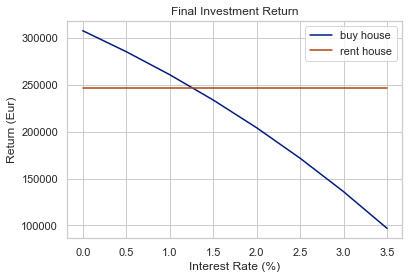

In [78]:
import seaborn as sns

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('dark')
plt.plot(int_rate*100, return_house, label='buy house')
plt.plot(int_rate*100, return_investment+int_rate*0.0, label='rent house')
plt.title('Final Investment Return')
plt.ylabel('Return (Eur)')
plt.xlabel('Interest Rate (%)')
plt.legend()

In [56]:
300/80*80

300.0